**Data 620 Week 6 Assignment**

Krutika Patel, Seung Min Song

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis). Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2. [Dataset](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html).
3. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  

Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.
You may work in a small group on this project.

Due end of day 3/5.

In [58]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd

In [59]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print(len(clubs))


14


In [60]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
'''print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")'''


'print()\nprint("#Friends, Member")\nfor w in women:\n    print(f"{W.degree(w)} {w}")'

In [61]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
#print()
#print("#Friend meetings, Member")
f_m = []
for w in women:
    #print(f"{W.degree(w, weight='weight')} {w}")
    f_m.append(W.degree(w, weight = 'weight'))

In [62]:
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
#nx.draw(G, pos)
#plt.show()

**Vizualization**

We will take a look at the network. The women will be represented by blue nodes sized according tho their degree centrality, and event will be represented by yellow nodes sized by their degree centrality.

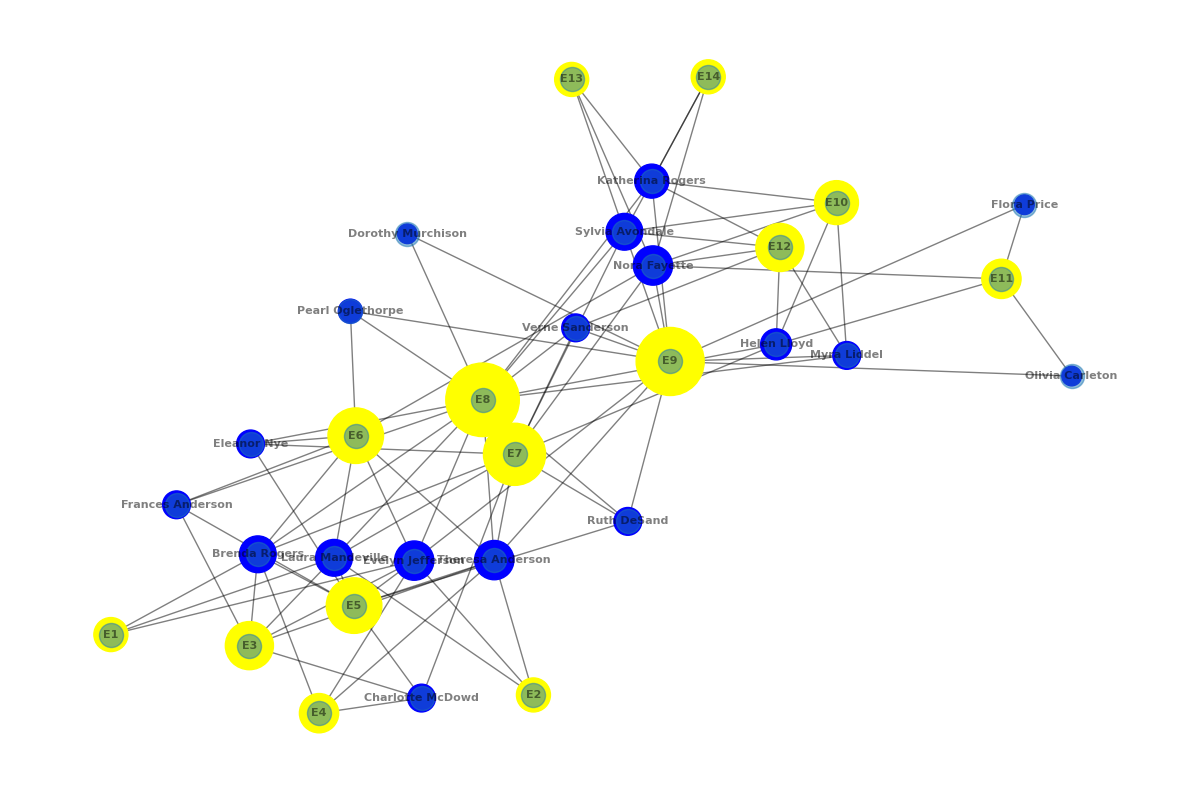

In [63]:
# calculate degree centrality
womenDegree = nx.degree(G, women)
clubsDegree = nx.degree(G, clubs)

plt.figure(1,figsize=(15,10))
plt.axis('off')

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=women,
                       node_color='blue',
                       node_size=[v * 100 for v in dict(womenDegree).values()])

nx.draw_networkx_nodes(G,pos,
                       nodelist=clubs,
                       node_color='yellow',
                       node_size=[v * 200 for v in dict(clubsDegree).values()])

# edges
nx.draw(G,pos,width=1.0,alpha=0.5, with_labels=True, font_size=8, font_color='black', font_weight='bold')

In [64]:
womenDegreeDF = pd.DataFrame()
womenDegreeDF['woman'] = dict(womenDegree).keys()
womenDegreeDF['event_connections'] = dict(womenDegree).values()

womenDegreeDF.sort_values(by='event_connections', ascending = False)

,woman,event_connections
0,Evelyn Jefferson,8
2,Theresa Anderson,8
13,Nora Fayette,8
1,Laura Mandeville,7
3,Brenda Rogers,7
12,Sylvia Avondale,7
11,Katherina Rogers,6
14,Helen Lloyd,5
10,Myra Liddel,4
9,Verne Sanderson,4


**Women Degree Centrality**

As we see in the newtwork that some of the women nodes are sized larger than others, we will take a look at their degree centrality, which represents the number of events they attended.

Next we will project our bipartite graph onto women nodes. The graph will only have women nodes with edges connecting women if they were at the same event. We will also look at the numbers in a dataframe format

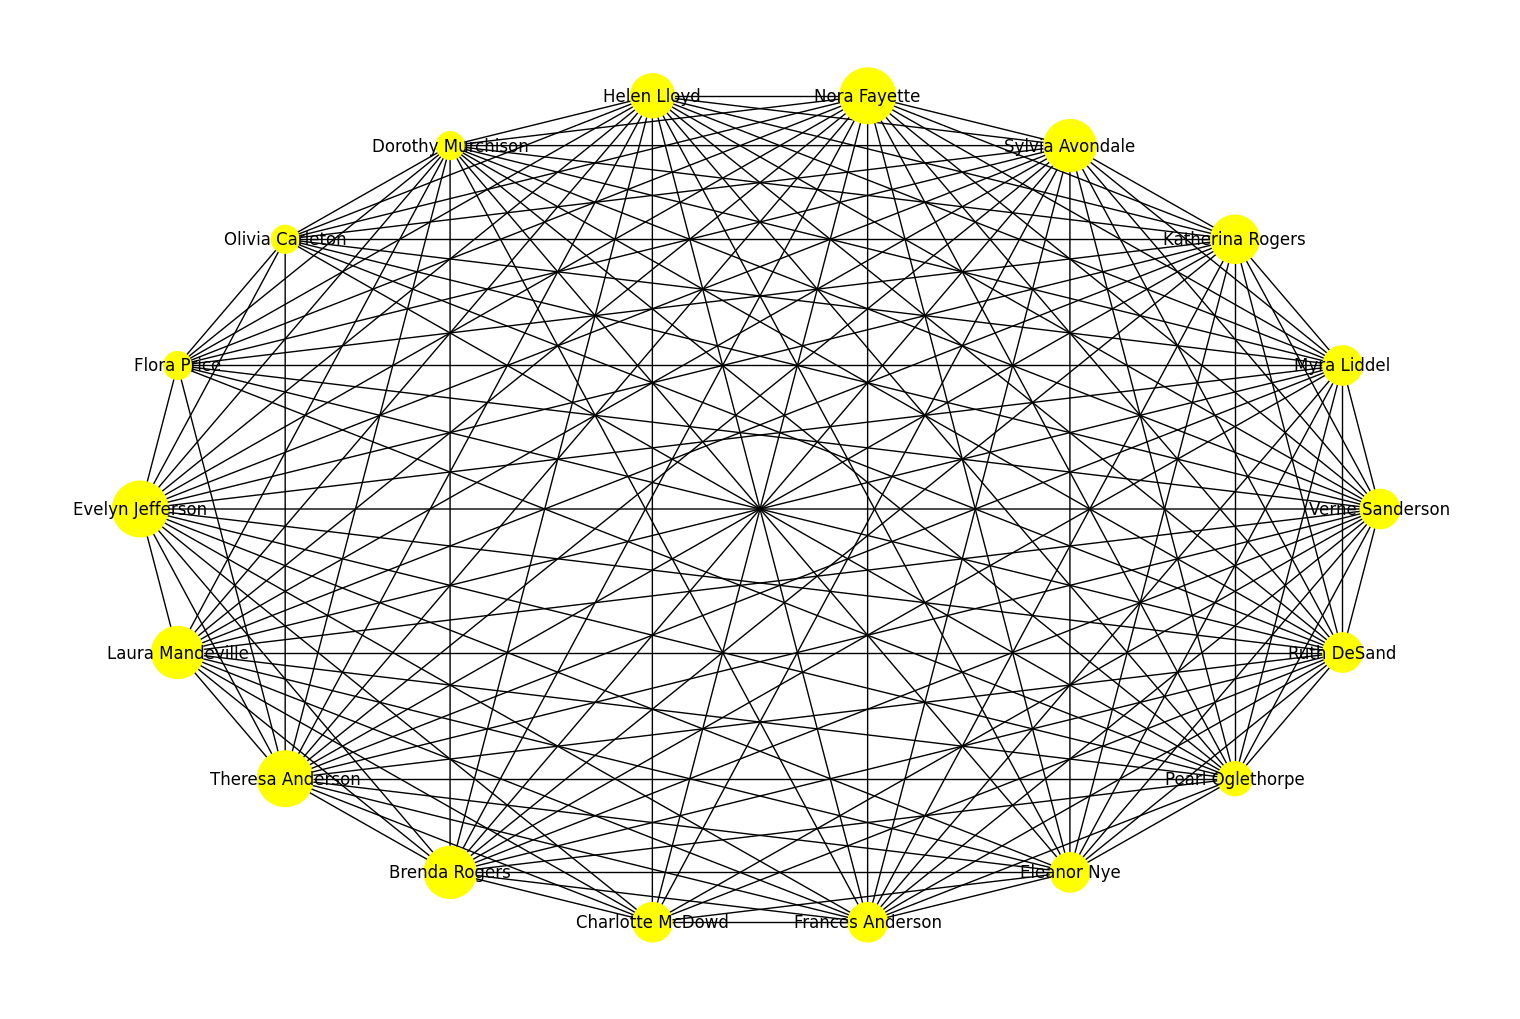

In [65]:
W = bipartite.projected_graph(G, women)
plt.figure(2,figsize=(15,10))
nx.draw_shell(W, with_labels = True, node_color = "yellow", node_size=[v * 200 for v in dict(womenDegree).values()])

In [66]:
womenAcquaintanceship = pd.DataFrame({'woman': [w for w in women], \
                                'acquaintance_count': [W.degree(w) for w in women]})
pd.DataFrame(womenAcquaintanceship.sort_values(by='acquaintance_count', ascending = False)).head()

,woman,acquaintance_count
0,Evelyn Jefferson,17
8,Ruth DeSand,17
14,Helen Lloyd,17
13,Nora Fayette,17
12,Sylvia Avondale,17


In [67]:
womenSocialActivity = womenDegreeDF.merge(womenAcquaintanceship)
womenSocialActivity.insert(2, "friend_meetings", f_m, True)
womenSocialActivity.iloc[:,[0,1,3,2]]

,woman,event_connections,acquaintance_count,friend_meetings
0,Evelyn Jefferson,8,17,50
1,Laura Mandeville,7,15,45
2,Theresa Anderson,8,17,57
3,Brenda Rogers,7,15,46
4,Charlotte McDowd,4,11,24
5,Frances Anderson,4,15,32
6,Eleanor Nye,4,15,36
7,Pearl Oglethorpe,3,16,31
8,Ruth DeSand,4,17,40
9,Verne Sanderson,4,17,38


**Women Between Centrality**

* Betweenness centrality is an indicator that measures how much a word helps build a network of words.
* Betweenness centrality is measured by the number of times a specific node appears in the shortest path between all nodes.

In [68]:
womenBET = nx.betweenness_centrality(W)

sorted_womenBET = dict(sorted(womenBET.items(), key=lambda x: x[1], reverse=True))


In [69]:
a_list, b_list = [], []
for node, centrality in sorted_womenBET.items():
  a_list.append(node)
  b_list.append(centrality)

women_bet = pd.DataFrame({'Node': a_list, 'Centrality': b_list})
del a_list, b_list

print(women_bet.head())

               Node  Centrality
0  Evelyn Jefferson    0.010122
1  Theresa Anderson    0.010122
2       Ruth DeSand    0.010122
3   Verne Sanderson    0.010122
4   Sylvia Avondale    0.010122


**Women Closeness Centrality**

* Closeness centrality is a measure of how close one word is to another word.
Unlike betweenness centrality, which measures only directly connected nodes
* closeness centrality measures the distance between all nodes that are directly or indirectly connected.

In [70]:
womenCLO = nx.closeness_centrality(W, distance='weight')

sorted_womenCLO = dict(sorted(womenCLO.items(), key=lambda x: x[1], reverse=True))

In [71]:
a_list, b_list = [], []
for node, centrality in sorted_womenCLO.items():
    a_list.append(node)
    b_list.append(centrality)

women_clo = pd.DataFrame({'Node': a_list, 'Centrality': b_list})
del a_list, b_list

print(women_clo.head())

               Node  Centrality
0  Evelyn Jefferson         1.0
1  Theresa Anderson         1.0
2       Ruth DeSand         1.0
3   Verne Sanderson         1.0
4   Sylvia Avondale         1.0


**Women Centrality Conlusion**

Comparing the results, there may be a certain correlation between Degreen Centrality, Betweenness Centrality and Close Centrality. The correlation between the three metrics may be higher, especially if the network is small or closely connected. Therefore, the results appear quite similar.


Using the projected network of women and the entrality measures we can see that Evelyn Jefferson, Theresa Anderson, Ruth DeSand, Verne Sanderson, and Sylvia Avondale are the most social women.

In [72]:
womenSocialActivity = womenDegreeDF.merge(womenAcquaintanceship)
womenSocialActivity.sort_values(by=['event_connections', 'acquaintance_count'], ascending = False).head()

,woman,event_connections,acquaintance_count
0,Evelyn Jefferson,8,17
2,Theresa Anderson,8,17
13,Nora Fayette,8,17
12,Sylvia Avondale,7,17
1,Laura Mandeville,7,15


**Event Degree Centrality**

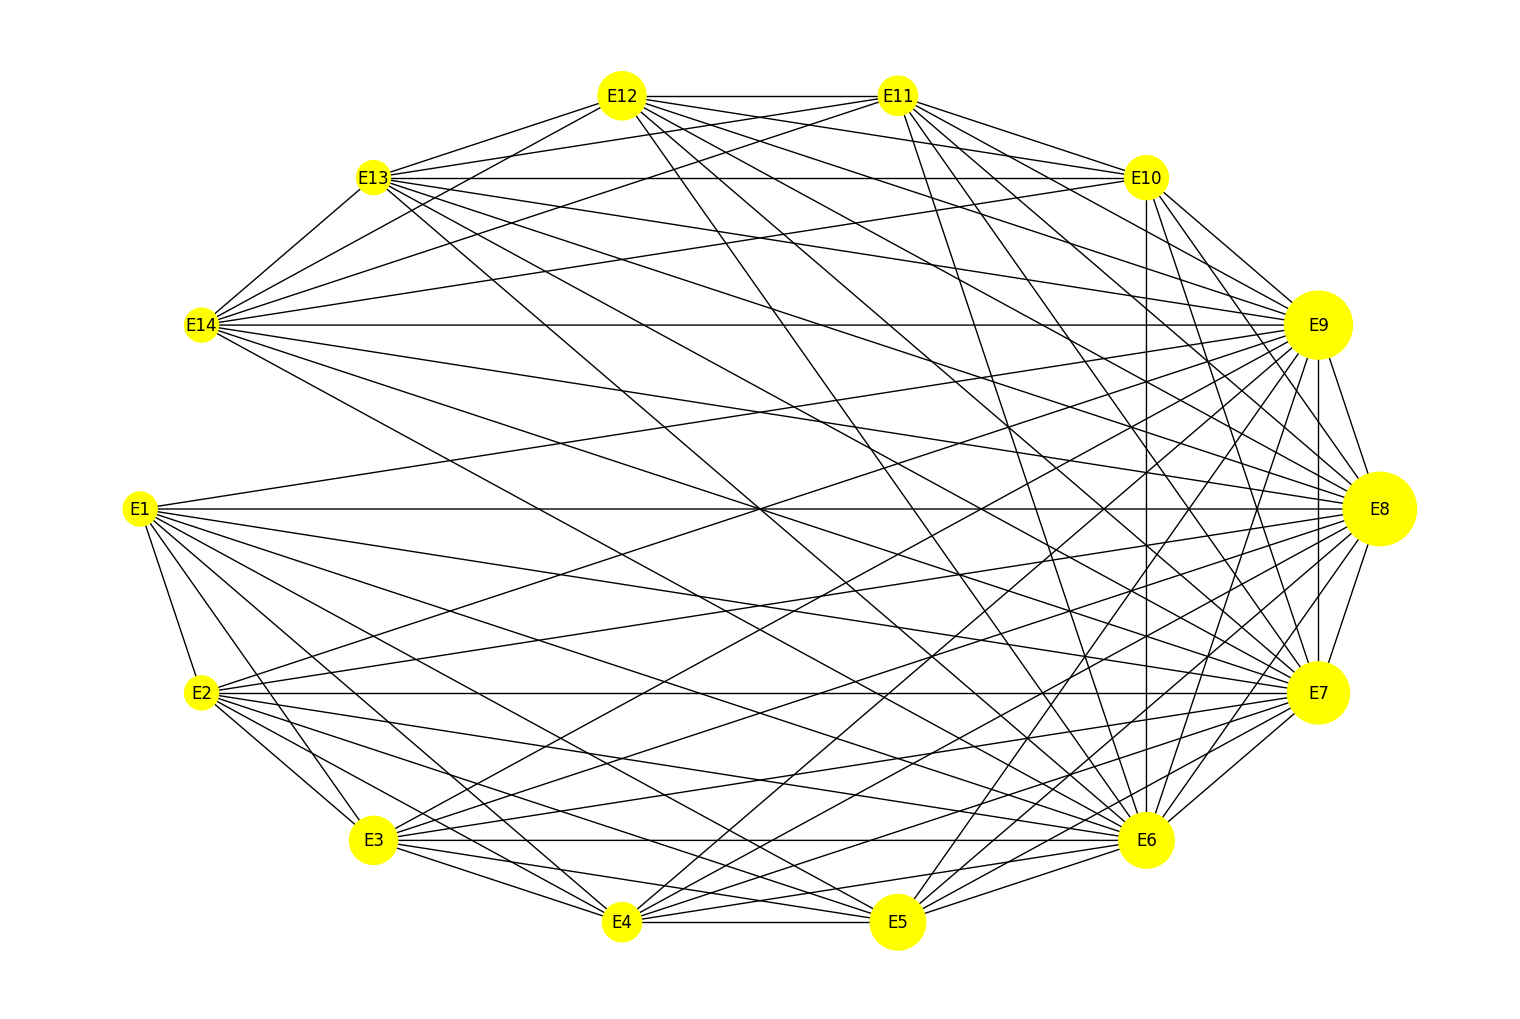

In [73]:
E = bipartite.projected_graph(G, clubs)
plt.figure(2,figsize=(15,10))
nx.draw_shell(E, with_labels = True, node_color = "yellow", node_size=[v * 200 for v in dict(clubsDegree).values()])

**Event Between Centrality**

In [74]:
eventBET = nx.betweenness_centrality(E)

sorted_eventBET = dict(sorted(eventBET.items(), key=lambda x: x[1], reverse=True))


In [75]:
a_list, b_list = [], []
for node, centrality in sorted_eventBET.items():
  a_list.append(node)
  b_list.append(centrality)

events_bet = pd.DataFrame({'Node': a_list, 'Centrality': b_list})
del a_list, b_list

print(events_bet.head())

  Node  Centrality
0   E6    0.080128
1   E7    0.080128
2   E8    0.080128
3   E9    0.080128
4   E1    0.000000


**Event Closeness Centrality**

In [76]:
eventsCLO = nx.closeness_centrality(E, distance='weight')

sorted_eventsCLO = dict(sorted(eventsCLO.items(), key=lambda x: x[1], reverse=True))

In [77]:
a_list, b_list = [], []
for node, centrality in sorted_eventsCLO.items():
    a_list.append(node)
    b_list.append(centrality)

events_clo = pd.DataFrame({'Node': a_list, 'Centrality': b_list})
del a_list, b_list

print(events_clo.head())

  Node  Centrality
0   E6    1.000000
1   E7    1.000000
2   E8    1.000000
3   E9    1.000000
4   E1    0.722222


**Event Centrality Conclusion**

Comparing the results, there may be a certain correlation between Degreen Centrality, Betweenness Centrality and Close Centrality. The correlation between the three metrics may be higher, especially if the network is small or closely connected. Therefore, the results appear quite similar.

Using the projected network of the 14 events, and the centrality measures we can see that events E6, E7, E8, and E9 were the most popular.